(sec_data)=

# Data

```{note}
Datasets are presumably of three types:

1. simulated data
2. experimental data
3. precomputed results

Datasets 1 and 2 will be used for analyses. Datasets of type 3 are
results that take a long time to compute (e.g. on a HPC) and will be
needed to enable compilation of jupyter book examples

Only small datasets are committed to this repo. In the case we need
larger datasets, setup an independent data repo.
```

Datasets reside in the `data` subdirectory
({numref}`table-simulated-datasets`). Simulated datasets have been
generated with the script `data/make_test_data.py`.

```{list-table} Simulated datasets
:header-rows: 1
:name: table-simulated-datasets

* - Dataset
  - Description
  - Location
* - ooa
  - Out of Africa
  - `data/ooa`
* - ooa-outgroups
  - Out of Africa with outgroups
  - `data/ooa-outgroups`
```


(sec_data_simulated)=

## Simulated data

The script `data/make_test_data.py` has subcommands to simulate
genealogies, mutations, and read data from a demographic model.
Demographic models are defined using the [Demes
specification](https://popsim-consortium.github.io/demes-spec-docs/main/introduction.html).
For neutral models, genealogies and mutations are [simulated with
msprime](https://tskit.dev/msprime/docs/stable/ancestry.html) and
saved as [succinct tree sequences](https://tskit.dev/learn.html#what)
that can be converted to standard variant call format (vcf) files.

The variant data represents the true state of the model. In addition,
we can assign haplotypes to each individual from which sequence reads
can be simulated. One simulated individual is chosen as reference and
a reference sequence is generated, either from experimental data or
randomly, for that individual. Given the reference and the variant
data, haplotype sequences are generated for each individual in the
model. The haplotype sequences are then used as templates to generate
sequencing reads with realistic error profiles. Currently
[insilicoseq](https://insilicoseq.readthedocs.io/en/latest/index.html)
is used to simulate reads.

Simulated reads are mapped with bwa to the reference and saved to bam
files. The raw data reads and haplotype sequences are finally
discarded to save space. Variant calling is done with GATK.

```{admonition} FIXME
:class: warning
Desired improvements:
- current datasets are based on randomly generated sequences. There
  is now a subcommand to download ucsc data from hg38 that would
  better represent GC content, repeats etc
- base mutations are random; model realistic ti/tv ratios better
```

(sec_data_simulated_ooa)=

### Out of Africa (ooa)

The out of Africa dataset is based on the
{cite}`gutenkunst_InferringJointDemographic_2009` demographic model
({numref}`fig-ooa-demesdraw`; see also 
example](https://tskit.dev/msprime/docs/stable/demography.html#population-tree)
and [the stdpopsim out of Africa model
specification](https://popsim-consortium.github.io/stdpopsim-docs/stable/catalog.html#sec_catalog_homsap_models_outofafrica_3g09)).

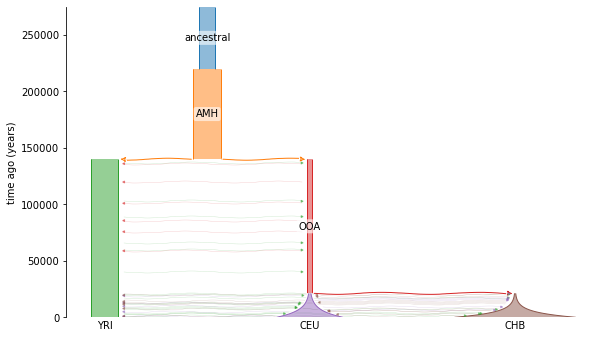

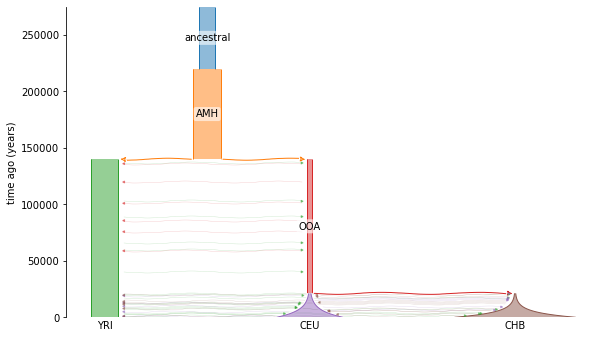

In [1]:
from myst_nb import glue
import demes
import demesdraw
ooa = demes.load("data/ooa/ooa.demes.yaml")
ax = demesdraw.tubes(ooa, num_lines_per_migration=6, seed=32)
glue("fig-ooa-demesdraw", ax.figure, display=False)

```{glue:figure} fig-ooa-demesdraw
:name: fig-ooa-demesdraw

[demesdraw](https://grahamgower.github.io/demesdraw/latest/quickstart.html) illustration of out of Africa model.
```


### Out of Africa with outgroups (ooa-outgroups)

The out of Africa with outgroups is an extension of the previous data
set ({numref}`fig-ooa-with-outgroups-demesdraw`). In addition to
simulating human data, the model has been expanded to include three
outgroups chimpanzee, gorilla and orangutan

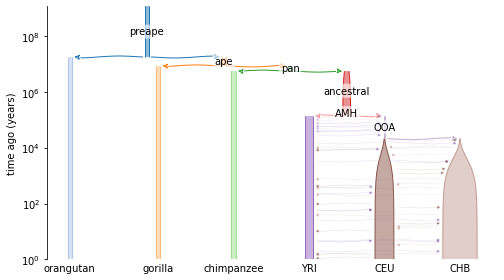

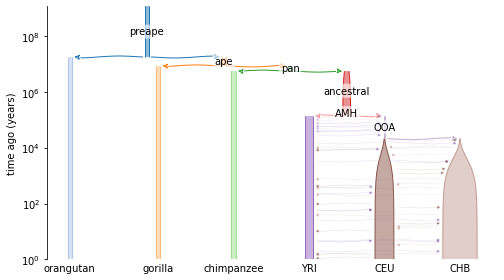

In [2]:
from myst_nb import glue
import demes
import demesdraw
ooa = demes.load("data/ooa-outgroups/ooa_with_outgroups.demes.yaml")
ax = demesdraw.tubes(ooa, num_lines_per_migration=6, log_time=True, seed=32)
glue("fig-ooa-with-outgroups-demesdraw", ax.figure, display=False)

```{glue:figure} fig-ooa-with-outgroups-demesdraw
:name: fig-ooa-with-outgroups-demesdraw

[demesdraw](https://grahamgower.github.io/demesdraw/latest/quickstart.html) illustration of out of Africa model, including outgroups chimpanzee, gorilla, and orangutan. Note that the time scale is in log units.
```